In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.datasets import load_breast_cancer 
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.shape

(569, 31)

In [7]:
df.dtypes


mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [8]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


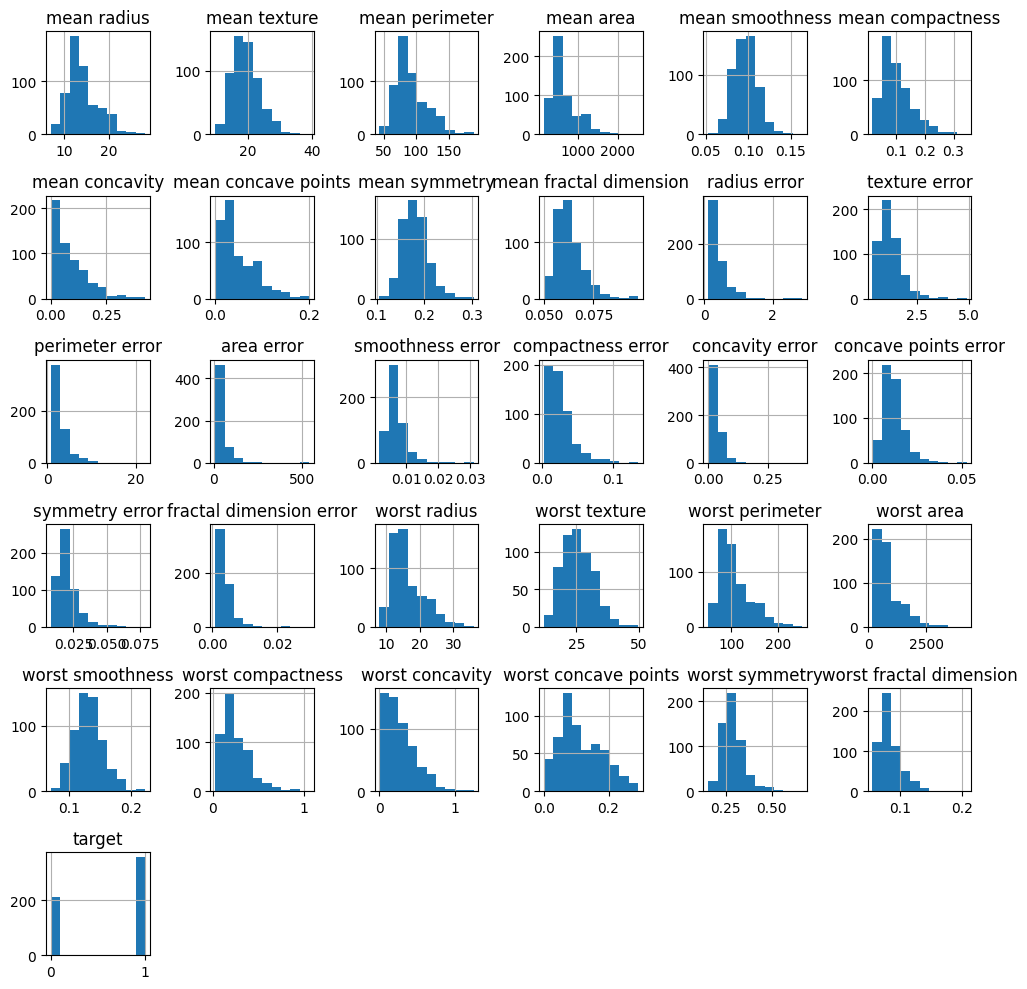

In [10]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10))
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


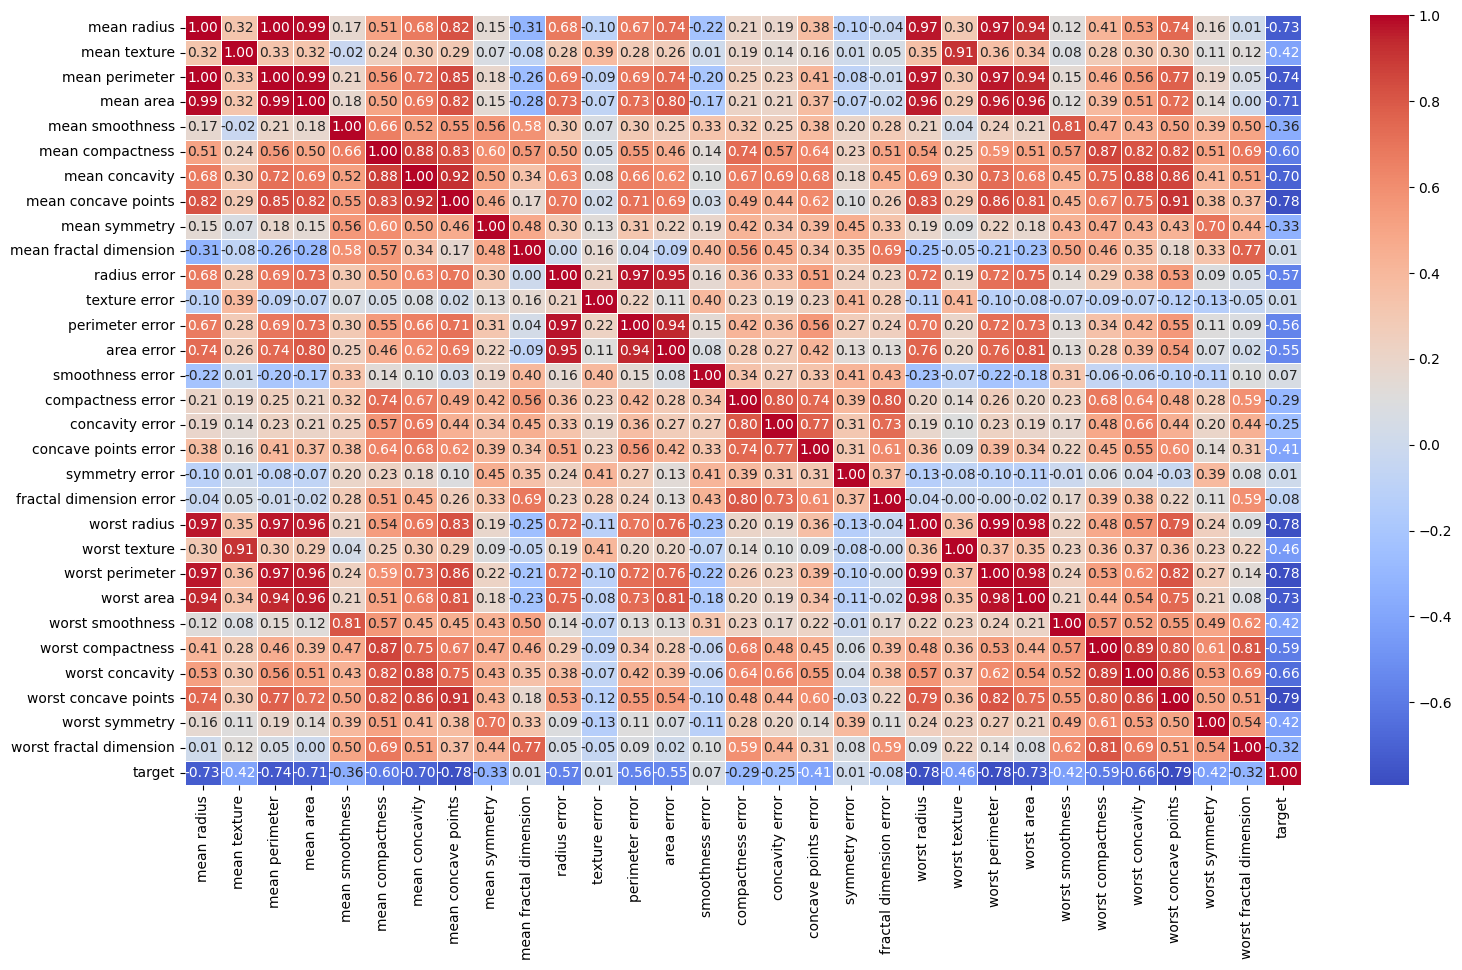

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(18, 10))

# Create the heatmap with adjusted parameters
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 10})
# Show the plot
plt.show()


####  Check for outliers using the Z-score method
#### The Z-score method identifies outliers by measuring how many standard deviations a data point is from the mean
#### Outliers are defined as data points with a Z-score greater than a certain threshold (e.g., 3)
#### This step helps identify extreme values that may skew the distribution of the data
#### and informs decisions on whether to remove or transform these outliers


In [11]:
from scipy.stats import zscore

# Define the threshold for identifying outliers
threshold = 3

# Dictionary to store outliers for each column
outliers_dict = {}

# Loop through each column in the DataFrame
for column in df.columns:
    # Calculate Z-scores for the current column
    z_scores = zscore(df[column])
    
    # Identify outliers based on Z-scores
    column_outliers = df[abs(z_scores) > threshold]
    
    # Store outliers in the dictionary
    outliers_dict[column] = column_outliers

# Print outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Outliers for column '{column}':")
    print(outliers)
    


Outliers for column 'mean radius':
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
82         25.22         24.91           171.5     1878.0           0.1063   
180        27.22         21.87           182.1     2250.0           0.1094   
212        28.11         18.47           188.5     2499.0           0.1142   
352        25.73         17.46           174.2     2010.0           0.1149   
461        27.42         26.27           186.9     2501.0           0.1084   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
82             0.2665          0.3339               0.1845         0.1829   
180            0.1914          0.2871               0.1878         0.1800   
212            0.1516          0.3201               0.1595         0.1648   
352            0.2363          0.3368               0.1913         0.1956   
461            0.1988          0.3635               0.1689         0.2061   

     mean fractal dimension  ... 

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
3          11.42         20.38           77.58      386.1          0.14250   
31         11.84         18.70           77.93      440.6          0.11090   
35         16.74         21.59          110.10      869.5          0.09610   
78         20.18         23.97          143.70     1245.0          0.12860   
119        17.95         20.01          114.20      982.0          0.08402   
146        11.80         16.58           78.99      432.0          0.10910   
190        14.22         23.12           94.37      609.9          0.10750   
323        20.34         21.51          135.90     1264.0          0.11700   
370        16.35         23.29          109.00      840.4          0.09742   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
3             0.28390         0.24140              0.10520         0.2597   
31            0.15160         0.12180              0.05182       

#### Check for outliers using the Interquartile Range (IQR) method
#### The IQR method identifies outliers based on the spread of the middle 50% of the data
#### Outliers are defined as data points lying below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
#### This step is important for identifying potentially erroneous or extreme data points
#### and deciding on appropriate treatment strategies such as removal or transformation


In [12]:
import numpy as np
import pandas as pd

def detect_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the indices of outliers
    outliers_indices = np.where((data < lower_bound) | (data > upper_bound))
    
    return outliers_indices

# Assuming 'df' is your DataFrame containing the dataset
# Iterate over each column in the DataFrame
for column in df.columns:
    outliers_indices = detect_outliers_iqr(df[column])
    print("Outliers in column '{}' at indices: {}".format(column, outliers_indices))


Outliers in column 'mean radius' at indices: (array([ 82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 369, 461, 503,
       521], dtype=int64),)
Outliers in column 'mean texture' at indices: (array([219, 232, 239, 259, 265, 455, 562], dtype=int64),)
Outliers in column 'mean perimeter' at indices: (array([ 82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 461, 503, 521],
      dtype=int64),)
Outliers in column 'mean area' at indices: (array([ 23,  82, 108, 122, 164, 180, 202, 212, 236, 250, 265, 272, 339,
       352, 368, 369, 372, 373, 393, 449, 461, 503, 521, 563, 564],
      dtype=int64),)
Outliers in column 'mean smoothness' at indices: (array([  3, 105, 122, 504, 520, 568], dtype=int64),)
Outliers in column 'mean compactness' at indices: (array([  0,   3,   9,  12,  14,  78,  82, 108, 122, 181, 190, 258, 351,
       352, 400, 567], dtype=int64),)
Outliers in column 'mean concavity' at indices: (array([  0,  68,  78,  82, 108, 112, 122, 152, 180, 202, 212, 258, 351,
       352, 400,

#### This code calculates the class distribution of a target variable named 'target' in the DataFrame.  It constructs a Pandas Series object representing the class distribution, where the index labels are 'malignant' and 'benign', and the corresponding values are the counts of instances in each class.

In [13]:
import numpy as np
import pandas as pd

# Define index labels for the Pandas Series object
index = ['malignant', 'benign']

# Select data where target equals 0.0 and 1.0 for malignant and benign values, respectively
malignants = np.where(df['target'] == 0.0)
benigns = np.where(df['target'] == 1.0)

# Get sizes and build a matrix
data = [np.size(malignants), np.size(benigns)]

# Construct a series object
series = pd.Series(data, index=index)

print(series)


malignant    212
benign       357
dtype: int64


####  separate the features (independent variables) from the target variable (dependent variable) by creating a feature matrix 'X' containing all the features except the target, and a target vector 'y' containing only the target variable. This separation is a common preprocessing step in machine learning workflows, allowing models to be trained using the features to predict the target variable.

In [14]:
X = df.drop('target', axis=1)
y = df['target']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=2)
    
print(X_train, X_test, y_train, y_test)



     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
489        16.69         20.20          107.10      857.6          0.07497   
194        14.86         23.21          100.40      671.4          0.10440   
188        11.81         17.39           75.27      428.9          0.10070   
285        12.58         18.40           79.83      489.0          0.08393   
362        12.76         18.84           81.87      496.6          0.09676   
..           ...           ...             ...        ...              ...   
299        10.51         23.09           66.85      334.2          0.10150   
534        10.96         17.62           70.79      365.6          0.09687   
493        12.46         12.83           78.83      477.3          0.07372   
527        12.34         12.27           78.94      468.5          0.09003   
168        17.47         24.68          116.10      984.6          0.10490   

     mean compactness  mean concavity  mean concave points  mea

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (426, 30) (143, 30)


## Model Training
### Logistic Regression


In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train,y_train)

C:\Users\sride\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train,X_train_prediction)

In [20]:
print('Accuracy on test data = ', training_data_accuracy)

Accuracy on test data =  0.9507042253521126


In [21]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test,X_test_prediction)

In [22]:
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9370629370629371


In [23]:
# Assuming 'df' is your DataFrame containing the dataset
# Selecting the first row from the DataFrame
input_data_row = df.iloc[0]

# Extracting the features from the selected row
input_data = input_data_row.drop('target').values

# Reshaping the input data for prediction
input_data_reshaped = input_data.reshape(1, -1)

# Making the prediction
prediction = model.predict(input_data_reshaped)

# Displaying the prediction
if prediction[0] == 0:
    print('The Breast cancer is Malignant')
else:
    print('The Breast Cancer is Benign')


The Breast cancer is Malignant


C:\Users\sride\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
precision = precision_score(y_test, X_test_prediction)
recall = recall_score(y_test, X_test_prediction)
f1 = f1_score(y_test, X_test_prediction)
roc_auc = roc_auc_score(y_test, X_test_prediction)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Precision: 0.9534883720930233
Recall: 0.9425287356321839
F1 Score: 0.9479768786127167
ROC AUC Score: 0.9355500821018062


### Logistic Regression, Naives Bayes Model , Decision Tree Classifier, Randon Forest Classifier, KNN, Support Vector Classifier


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    X_train_prediction = model.predict(X_train)
    X_test_prediction = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy_train = accuracy_score(y_train, X_train_prediction)
    accuracy_test = accuracy_score(y_test, X_test_prediction)
    precision_test = precision_score(y_test, X_test_prediction)
    recall_test = recall_score(y_test, X_test_prediction)
    f1_test = f1_score(y_test, X_test_prediction)
    roc_auc_test = roc_auc_score(y_test, X_test_prediction)
    
    # Display evaluation metrics
    print("Model:", type(model).__name__)
    print("Accuracy (Train):", accuracy_train)
    print("Accuracy (Test):", accuracy_test)
    print("----------------------------------------")
    print("Precision (Test):", precision_test)
    print("----------------------------------------")
    print("Recall (Test):", recall_test)
    print("----------------------------------------")
    print("F1 Score (Test):", f1_test)
    print("----------------------------------------")
    print("ROC AUC Score (Test):", roc_auc_test)
    print("----------------------------------------")

# Define the models
models = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC()
]

# Iterate over each model
for model in models:
    print("========================================")
    evaluate_model(model, X_train, X_test, y_train, y_test)


Model: LogisticRegression
Accuracy (Train): 0.9507042253521126
Accuracy (Test): 0.9370629370629371
----------------------------------------
Precision (Test): 0.9534883720930233
----------------------------------------
Recall (Test): 0.9425287356321839
----------------------------------------
F1 Score (Test): 0.9479768786127167
----------------------------------------
ROC AUC Score (Test): 0.9355500821018062
----------------------------------------
Model: GaussianNB
Accuracy (Train): 0.9436619718309859
Accuracy (Test): 0.9300699300699301
----------------------------------------
Precision (Test): 0.9425287356321839
----------------------------------------
Recall (Test): 0.9425287356321839
----------------------------------------
F1 Score (Test): 0.9425287356321839
----------------------------------------
ROC AUC Score (Test): 0.9266215106732348
----------------------------------------
Model: DecisionTreeClassifier
Accuracy (Train): 1.0
Accuracy (Test): 0.9440559440559441
----------------

C:\Users\sride\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: RandomForestClassifier
Accuracy (Train): 1.0
Accuracy (Test): 0.9440559440559441
----------------------------------------
Precision (Test): 0.9540229885057471
----------------------------------------
Recall (Test): 0.9540229885057471
----------------------------------------
F1 Score (Test): 0.9540229885057471
----------------------------------------
ROC AUC Score (Test): 0.9412972085385879
----------------------------------------
Model: KNeighborsClassifier
Accuracy (Train): 0.9530516431924883
Accuracy (Test): 0.9230769230769231
----------------------------------------
Precision (Test): 0.9318181818181818
----------------------------------------
Recall (Test): 0.9425287356321839
----------------------------------------
F1 Score (Test): 0.9371428571428572
----------------------------------------
ROC AUC Score (Test): 0.9176929392446633
----------------------------------------
Model: SVC
Accuracy (Train): 0.9225352112676056
Accuracy (Test): 0.916083916083916
----------------------